In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib as mpl
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as plt

import numpy as np
from scipy import stats
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import preprocessing

%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm

from scipy.stats import mode

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")



In [3]:
data1 = pd.read_csv(r'/Users/Supreetha/Downloads/UsedCarMaster.csv')
df1 = data1.dropna(subset=['maker'])

In [4]:
data1.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [7]:
#Since this dataset is huge and had too many anomalies, we came to a conclusion, that we will look at the data, 
#only for following features :maker, model, mileage, manufacture year, price, fuel type.

data1_subset = data1[['maker', 'model', 'mileage', 'manufacture_year', 'price_eur', 'fuel_type']]


In [8]:
#We did a quick analysis on the number of vehicles spread across years and saw that there was good enough data  for cars
#that were manufactured after 2010.
#We also looked at the distribution of data for price, we found out that majority of the dataset was
#between the range 5000 to 100000. So we applied all the filters to eventually end up at well distributed dataset.

data1_subset = data1_subset.drop(data1_subset[data1_subset.manufacture_year < 2010].index)
data1_subset = data1_subset.drop(data1_subset[data1_subset.price_eur < 5000].index)
data1_subset = data1_subset.drop(data1_subset[data1_subset.price_eur > 100000].index)

#data1_subset = data1_subset.drop(data1_subset[data1_subset.mileage < 50000].index)
#data1_subset = data1_subset.drop(data1_subset[data1_subset.mileage > 1000].index)

# 3. Drop rows where the maker is null: Reduced to 4473950
data1_subset['maker'].dropna(inplace=True)
data1_subset['model'].dropna(inplace=True)

data1_subset['maker'] = data1_subset.maker.astype('category')
data1_subset['model'] = data1_subset.model.astype('category')

In [9]:
data1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508946 entries, 0 to 1048573
Data columns (total 6 columns):
maker               368656 non-null category
model               265056 non-null category
mileage             499369 non-null float64
manufacture_year    450673 non-null float64
price_eur           508946 non-null float64
fuel_type           508946 non-null object
dtypes: category(2), float64(3), object(1)
memory usage: 20.9+ MB


In [10]:
# Used 38 unique makers
maker_list = data1_subset['maker'].unique().tolist()
print (len(maker_list))
print(maker_list)

38
['ford', 'skoda', 'bmw', 'kia', nan, 'suzuki', 'rover', 'citroen', 'audi', 'toyota', 'seat', 'hyundai', 'nissan', 'chevrolet', 'opel', 'mercedes-benz', 'volvo', 'fiat', 'honda', 'dodge', 'subaru', 'mitsubishi', 'mazda', 'chrysler', 'porsche', 'jaguar', 'jeep', 'mini', 'lancia', 'lexus', 'smart', 'tesla', 'maserati', 'hummer', 'isuzu', 'lamborghini', 'bentley', 'lotus']


In [10]:
# With 437 different cars
model_list = data1_subset['model'].unique().tolist()
print (len(model_list))

438


In [11]:
max_year = data1_subset['manufacture_year'].max()
min_year = data1_subset['manufacture_year'].min()
max_year


2016.0

In [13]:
min_year

2010.0

In [ ]:
# The current data set has the highest number of cars manufactured in 2015. this is in sync with the real world where
# the year 2015 had the highest number of cars manufactured.
# [Reference] : https://www.washingtonpost.com/business/economy/us-car-sales-hit-record-high-in-2015/2016/01/05/363aaf30-af14-11e5-b820-eea4d64be2a1_story.html?noredirect=on&utm_term=.958cb298154d

#Uncomment in the end coz it takes a while to run
#mode(data1_subset['manufacture_year'])

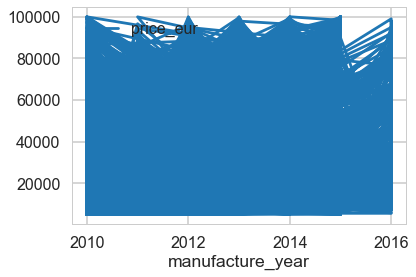

In [12]:
mpl.rcParams['agg.path.chunksize'] = 10000
ax = data1_subset.plot(x="manufacture_year",y="price_eur")

In [13]:
makes_list = ['skoda', 'kia', 'suzuki', 'rover', 'citroen',  'seat', 'opel' ,
                         'volvo', 'fiat', 'dodge', 'subaru', 'mitsubishi',' chrysler', 'jeep',
                         'mini', 'lancia' , 'smart', 'hummer', 'isuzu',  'bentley', 'lotus']
#loc_ = ~data1_subset.model.isin(makes_list)
data1_subset_cleaned = data1_subset.loc[~(data1_subset.maker.isin(makes_list)).values]     
data1_subset_cleaned.drop_duplicates()
data1_subset_cleaned.dropna(inplace = True)
data1_subset_cleaned.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(107377, 6)

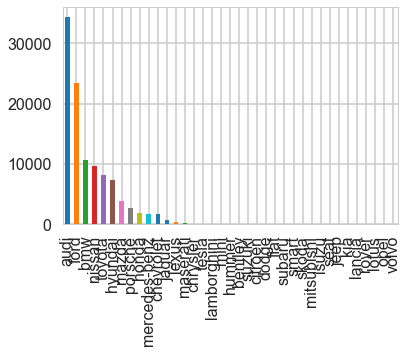

In [17]:
price_mileage_df = data1_subset_cleaned[["price_eur", "mileage"]]
data1_subset_cleaned['maker'].value_counts().plot(kind = 'bar')
# What we could infer from the above screenshot is that cars from makers such as audi, opel,
# ford etc had highest number of cars available in the used car market for re-sale.

Text(0,0.5,'Price')

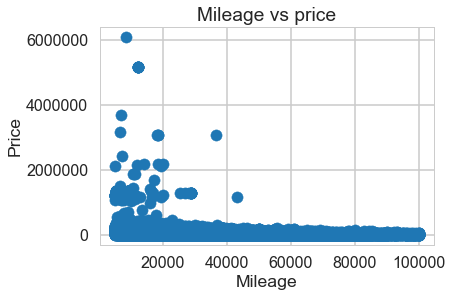

In [18]:
plt.scatter(data1_subset_cleaned['price_eur'],  data1_subset_cleaned['mileage'])
plt.title("Mileage vs price")
plt.xlabel("Mileage")
plt.ylabel("Price")
#From the above analysis, we can infer that lesser the mileage of the car, higher the price ( or residual value) of the car.

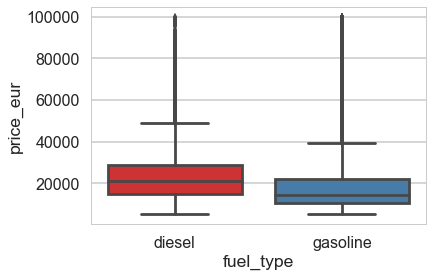

In [20]:
#Shows an even distribution of diesel and gasoline
#plt.scatter(data1_subset_cleaned['fuel_type'],  data1_subset_cleaned['price_eur'])
ax1 = sns.boxplot(x='fuel_type', y = 'price_eur', data = data1_subset_cleaned, palette = "Set1")

# We can conclude from the boxplot below that the average resale price of a diesel vehicle is much higher than the 
# corresponding gasoline fueled car. Not only is the mean price higher for a diesel based vehicle, but it remains higher
# even after one deviation, (both one deviation above and below). 

In [34]:
#Since manufacture year is a categorical value inorder to apply linear regression
#we convert the categorical varibale to ordered continuous variable and assigning in new column called AgeOfCar
data1_subset_cleaned.info()
data1_subset_cleaned['Current Year'] = datetime.datetime.now().year
data1_subset_cleaned['AgeOfCar']=data1_subset_cleaned['Current Year']-data1_subset_cleaned['manufacture_year']
data1_subset_cleaned.info()
data1_subset_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107377 entries, 0 to 1048516
Data columns (total 6 columns):
maker               107377 non-null category
model               107377 non-null category
mileage             107377 non-null float64
manufacture_year    107377 non-null float64
price_eur           107377 non-null float64
fuel_type           107377 non-null object
dtypes: category(2), float64(3), object(1)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 107377 entries, 0 to 1048516
Data columns (total 8 columns):
maker               107377 non-null category
model               107377 non-null category
mileage             107377 non-null float64
manufacture_year    107377 non-null float64
price_eur           107377 non-null float64
fuel_type           107377 non-null object
Current Year        107377 non-null int64
AgeOfCar            107377 non-null float64
dtypes: category(2), float64(4), int64(1), object(1)
memory usage: 6.1+ MB


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,maker,model,mileage,manufacture_year,price_eur,fuel_type,Current Year,AgeOfCar
0,ford,galaxy,151000.0,2011.0,10584.75,diesel,2018,7.0
36,ford,focus,159427.0,2012.0,8771.28,diesel,2018,6.0
37,ford,galaxy,160235.0,2012.0,11102.89,diesel,2018,6.0
46,audi,a8,4000.0,2014.0,98692.30,diesel,2018,4.0
53,ford,mondeo,164867.0,2012.0,11102.89,diesel,2018,6.0


In [32]:
# Run linear regression for predictor variable 'mileage' with 'price_eur' as target variable
df_standard = data1_subset_cleaned[['mileage', 'price_eur']]

lm  = LinearRegression()
X = data1_subset_cleaned[['mileage']]
Y = data1_subset_cleaned['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     4162.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:28:29   Log-Likelihood:            -3.7204e+05
No. Observations:               32214   AIC:                         7.441e+05
Df Residuals:                   32213   BIC:                         7.441e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mileage        0.0929      0.001     64.511      0.000       0.090       0.096
==============================================================================
Omnibus:                    18772.771   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6209972.197
Skew:                          -1.593   Prob(JB):                         0.00
Kurtosis:                      70.944   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

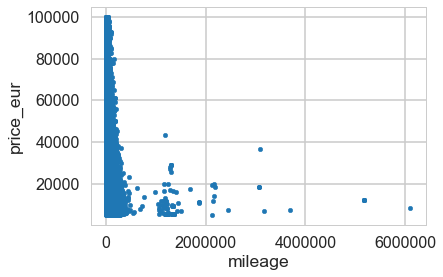

In [21]:
#from the above when we applied linear regression for predictor variable 'mileage' with 'price_eur' as target variable
#we noticed that the mean squared value is so less. When we plot the mileage vs price_eur scatter plot, we can see that data 
# is so highly left skewed. Hence its obvious that the mean squared is very less

ax = data1_subset_cleaned.plot.scatter(x="mileage", y="price_eur")

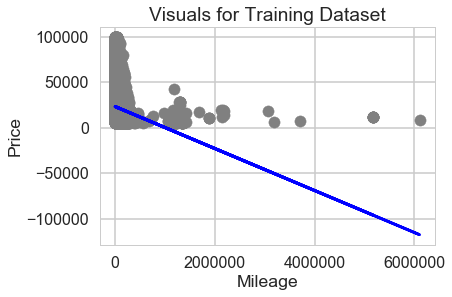

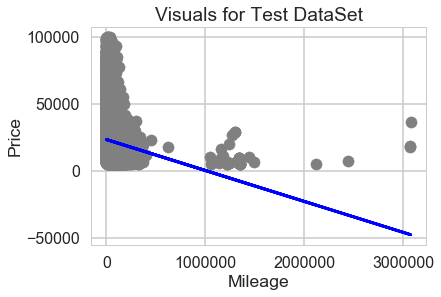

In [59]:
#Visualizing the training Test Results 
plt.scatter(X_train, Y_train, color= 'gray')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, Y_test, color= 'gray')
plt.plot(X_test, lm.predict(X_test), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [26]:
# since the dataset is highly skewed, tried scaling the data for mileage and price_eur
# used the standard scaler fit transform 
# even after scaling, mean squared value is still low
# we can infer that may be on this dataset, multilinear regression was a better choice.
np.random.seed(1)
df_standard = data1_subset_cleaned[['mileage', 'price_eur']]

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_standard)
scaled_df = pd.DataFrame(scaled_df, columns=['mileage', 'price_eur'])

lm  = LinearRegression()
X = scaled_df[['mileage']]
Y = scaled_df['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test, X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     771.7
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          7.24e-168
Time:                        13:31:57   Log-Likelihood:                -45243.
No. Observations:               32214   AIC:                         9.049e+04
Df Residuals:                   32213   BIC:                         9.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mileage       -0.1661      0.006    -27.780      0.000      -0.178      -0.154
==============================================================================
Omnibus:                    12897.118   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52651.000
Skew:                           1.993   Prob(JB):                         0.00
Kurtosis:                       7.832   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

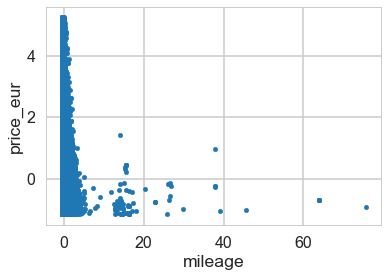

In [27]:
# Scatter plot after scaler fit also is so left skewed.

ax = scaled_df.plot.scatter(x="mileage", y="price_eur")

In [38]:
#Predicts the car price using  age of car and price. 
np.random.seed(1)
df_standard = data1_subset_cleaned[['AgeOfCar', 'price_eur']]

lm  = LinearRegression()
X = df_standard[['AgeOfCar']]
Y = df_standard['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 3.840e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:40:28   Log-Likelihood:            -3.6135e+05
No. Observations:               32214   AIC:                         7.227e+05
Df Residuals:                   32213   BIC:                         7.227e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AgeOfCar    3804.1730     19.414    195.948      0.000    3766.121    3842.225
==============================================================================
Omnibus:                     7541.888   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18360.098
Skew:                           1.299   Prob(JB):                         0.00
Kurtosis:                       5.632   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

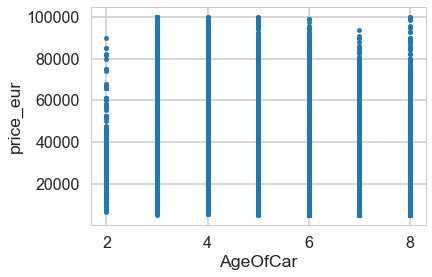

In [39]:
# We can see that for Age of car, data is spread as a result have mean squared value at 0.544

ax = df_standard.plot.scatter(x="AgeOfCar", y="price_eur")

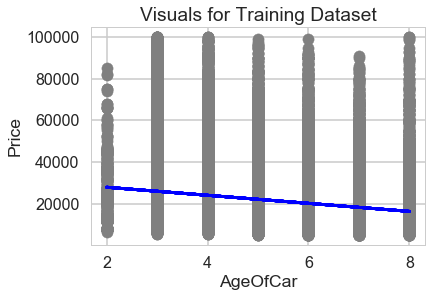

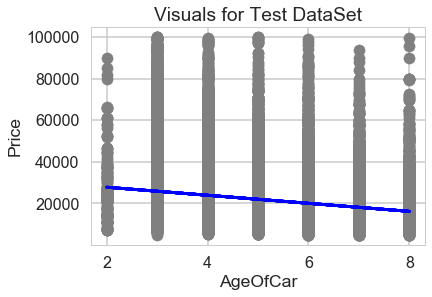

In [40]:
#Visualizing the training Test Results 
plt.scatter(X_train, Y_train, color= 'gray')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("AgeOfCar")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, Y_test, color= 'gray')
plt.plot(X_test, lm.predict(X_test), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("AgeOfCar")
plt.ylabel("Price")
plt.show()

In [42]:
# Uses all predictor variables, with model and make one-hot-encoded:
# Using the model and make does increase the accuracy

#As we know, for a categorical ordered dataset, we cannot apply linear regression. In-order to bring in the featured variables
#into linear regression analysis, we used one hot encoding.
#One hot encoding is a technique where categorical variables are converted to a binary value matrix where 
#the occurrence of a value is represented by 1
#Since, linear regression or machine learning techniques cannot work with categorical variable directly, 
#we need to use such a technique. Also bringing in categorical variables into our analysis may give us better prediction.

one_hot_encode_make = pd.get_dummies(data1_subset_cleaned['maker'])
data1_subset_cleaned_encoded = pd.concat([data1_subset_cleaned, one_hot_encode_make], axis=1)

X_temp = data1_subset_cleaned_encoded.loc[:, data1_subset_cleaned_encoded.columns != 'price_eur']
X_temp = X_temp.loc[:, X_temp.columns != 'fuel_type']
X_temp = X_temp.loc[:, X_temp.columns != 'fuel_count']
X_temp = X_temp.loc[:, X_temp.columns != 'maker']
X_temp = X_temp.loc[:, X_temp.columns != 'model']

X = X_temp
Y = data1_subset_cleaned_encoded['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,X_test)
result = model.fit()
result.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     2086.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:43:51   Log-Likelihood:            -3.4289e+05
No. Observations:               32214   AIC:                         6.858e+05
Df Residuals:                   32195   BIC:                         6.860e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mileage             -0.0109      0.001    -12.071      0.000      -0.013      -0.009
manufacture_year   768.7186     12.587     61.072      0.000     744.047     793.390
Current Year      -745.7357     12.500    -59.657      0.000    -770.237    -721.234
AgeOfCar         -1514.4542     25.086    -60.372      0.000   -1563.623   -1465.286
audi             -7518.7290    644.555    -11.665      0.000   -8782.081   -6255.377
bentley          -1.685e-11   1.53e-12    -10.994      0.000   -1.99e-11   -1.38e-11
bmw                 43.2782    658.871      0.066      0.948   -1248.134    1334.691
chevrolet        -1.893e+04    768.719    -24.627      0.000   -2.04e+04   -1.74e+04
chrysler         -1.209e+04   1976.788     -6.114      0.000    -1.6e+04   -8210.575
citroen          -2.848e-11   1.15e-12    -24.812      0.000   -3.07e-11   -2.62e-11
dodge             7.671e-11   7.22e-12     10.625      0.000    6.26e-11    9.09e-11
fiat              1.482e-11   3.16e-12      4.688      0.000    8.63e-12     2.1e-11
ford             -2.055e+04    647.613    -31.732      0.000   -2.18e+04   -1.93e+04
honda            -1.865e+04    747.357    -24.949      0.000   -2.01e+04   -1.72e+04
hummer            1.308e-11    1.1e-12     11.872      0.000    1.09e-11    1.52e-11
hyundai          -2.204e+04    668.534    -32.967      0.000   -2.34e+04   -2.07e+04
isuzu             3.286e-12   2.26e-12      1.456      0.145   -1.14e-12    7.71e-12
jaguar            8166.2213    886.260      9.214      0.000    6429.119    9903.324
jeep             -1.277e-11   1.15e-12    -11.106      0.000    -1.5e-11   -1.05e-11
kia                       0          0        nan        nan           0           0
lamborghini       7.211e+04   9559.818      7.543      0.000    5.34e+04    9.09e+04
lancia                    0          0        nan        nan           0           0
lexus            -4837.9652   1103.936     -4.382      0.000   -7001.721   -2674.209
lotus                     0          0        nan        nan           0           0
maserati          2.882e+04   1181.305     24.400      0.000    2.65e+04    3.11e+04
mazda            -1.773e+04    695.288    -25.502      0.000   -1.91e+04   -1.64e+04
mercedes-benz    -1.002e+04    762.210    -13.147      0.000   -1.15e+04   -8526.551
mini                      0          0        nan        nan           0           0
mitsubishi                0          0        nan        nan           0           0
nissan           -1.996e+04    662.035    -30.154      0.000   -2.13e+04   -1.87e+04
opel                      0          0        nan        nan           0           0
porsche           2.757e+04    719.206     38.339      0.000    2.62e+04     2.9e+04
rover                     0          0        nan        nan           0           0
seat                   

In [43]:
#Extract only those rows where the make of the car is Toyota. The reason we filter is to combine this data with another dataset
# bring in the column 'color' and see if there is any influence of color on prediction
data1_latent = data1_subset.drop(data1_subset[data1_subset.maker != "toyota"].index)
data1_latent.drop(['maker'], axis=1, inplace=True)

#Select model, price and mileage
data1_latent = data1_latent[['model', 'mileage', 'price_eur']]
data1_latent['color'] = "No color"

data1_latent.columns = data1_latent.columns.str.replace('price_eur','price')

In [44]:
#importing toyota cars dataset
data2 = pd.read_csv(r'/Users/Supreetha/Downloads/usedcars.csv')
#Select model, price and mileage
data2 = data2[['model', 'mileage', 'price', 'color']]
data2.dropna(inplace= True)
data2 = data2.drop(data2[data2.price < 5000].index)
data2 = data2.drop(data2[data2.price > 100000].index)

data2 = data2.drop(data2[data2.mileage < 500].index)
data2 = data2.drop(data2[data2.mileage > 200000].index)

In [45]:
data1_latent = data1_latent.append(data2)
data1_latent.dropna(inplace=True)

In [46]:
data1_latent.head()

,model,mileage,price,color
67,auris,5.0,14985.20,No color
68,aygo,5.0,8878.57,No color
127,avensis,113457.0,12213.18,No color
136,aygo,14221.0,6328.65,No color
317,yaris,45000.0,6883.79,No color


In [47]:
#With color:
one_hot_encode_model = pd.get_dummies(data1_latent['model']) # check the syntax for only one column
one_hot_encode_color = pd.get_dummies(data1_latent['color'])

data3_df = pd.concat([data1_latent, one_hot_encode_color, one_hot_encode_model], axis=1)

data3_df = data3_df.reset_index()
X_temp = data3_df.loc[:, data3_df.columns != 'price']
X_temp = X_temp.loc[:, X_temp.columns != 'model']
X_temp = X_temp.loc[:, X_temp.columns != 'color']


X = X_temp
Y = data3_df['price']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test,X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:44:50   Log-Likelihood:                -26909.
No. Observations:                2783   AIC:                         5.389e+04
Df Residuals:                    2749   BIC:                         5.409e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
index             0.0004      0.000      1.452      0.147      -0.000       0.001
mileage          -0.0422      0.001    -28.774      0.000      -0.045      -0.039
Black          4037.5088   1501.398      2.689      0.007    1093.527    6981.490
Blue           4478.3124   1858.896      2.409      0.016     833.339    8123.286
Gold          -5.496e-07   1.36e-07     -4.047      0.000   -8.16e-07   -2.83e-07
Gray           3102.4364   2227.074      1.393      0.164   -1264.471    7469.344
Green          2395.0782   3658.556      0.655      0.513   -4778.717    9568.874
No color       2.336e+04    419.268     55.728      0.000    2.25e+04    2.42e+04
Red            3557.0481   2157.335      1.649      0.099    -673.114    7787.210
Silver         3629.6233   1343.403      2.702      0.007     995.442    6263.805
White          3978.6763   1916.803      2.076      0.038     220.156    7737.196
Yellow         9457.9848   3741.096      2.528      0.012    2122.341    1.68e+04
SE             1.014e+04   1116.493      9.084      0.000    7953.428    1.23e+04
SEL            1.285e+04   1362.418      9.429      0.000    1.02e+04    1.55e+04
SES            1.165e+04   1394.092      8.355      0.000    8913.595    1.44e+04
auris         -7543.2222    420.689    -17.931      0.000   -8368.121   -6718.324
avensis       -4355.7417    470.873     -9.250      0.000   -5279.043   -3432.440
avensis-verso -9577.1240   3709.249     -2.582      0.010   -1.69e+04   -2303.927
aygo           -1.47e+04    434.719    -33.804      0.000   -1.55e+04   -1.38e+04
camry         -7048.8232   2632.834     -2.677      0.007   -1.22e+04   -1886.291
carina        -1.771e-11   2.74e-12     -6.457      0.000   -2.31e-11   -1.23e-11
corolla       -8018.1651   1059.512     -7.568      0.000   -1.01e+04   -5940.646
corolla-verso -1.128e+04   1887.423     -5.978      0.000    -1.5e+04   -7582.197
fj-cruiser     2.609e+04   2632.864      9.910      0.000    2.09e+04    3.13e+04
gt86          -2619.9469   1000.952     -2.617      0.009   -4582.641    -657.253
highlander    -1341.6613   2633.986     -0.509      0.611   -6506.453    3823.131
hilux          -203.7551    653.218     -0.312      0.755   -1484.603    1077.093
iq            -1.375e+04    670.159    -20.515      0.000   -1.51e+04   -1.24e+04
land-cruiser   2.018e+04    573.344     35.199      0.000    1.91e+04    2.13e+04
prius         -4644.8258    576.082     -8.063      0.000   -5774.423   -3515.229
proace        -5398.2577   1693.400     -3.188      0.001   -8718.724   -2077.792
rav4          -1284.0257    484.404     -2.651      0.008   -2233.859    -334.193
runner        -6790.9563   2633.207     -2.579      0.010    -1.2e+04   -1627.691
sequoia        3.391e+04   2633.145     12.877      0.000    2.87e+04    3.91e+04
sienna         3.178e+04   3704.491      8.578   

In [48]:
#Without color

one_hot_encode_model = pd.get_dummies(data1_latent['model'])

data3_df = pd.concat([data1_latent, one_hot_encode_model], axis=1)

data3_df = data3_df.reset_index()
X_temp = data3_df.loc[:, data3_df.columns != 'price']
X_temp = X_temp.loc[:, X_temp.columns != 'model']
X_temp = X_temp.loc[:, X_temp.columns != 'color']

X = X_temp
Y = data3_df['price']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test, X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     271.6
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:44:57   Log-Likelihood:                -27231.
No. Observations:                2783   AIC:                         5.451e+04
Df Residuals:                    2758   BIC:                         5.466e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
index         -1.698e-05      0.000     -0.059      0.953      -0.001       0.001
mileage          -0.0063      0.001    -11.275      0.000      -0.007      -0.005
SE             1.327e+04    881.583     15.052      0.000    1.15e+04     1.5e+04
SEL            1.649e+04   2158.689      7.639      0.000    1.23e+04    2.07e+04
SES            1.327e+04   1115.013     11.897      0.000    1.11e+04    1.55e+04
auris          1.512e+04    234.431     64.482      0.000    1.47e+04    1.56e+04
avensis        1.649e+04    325.384     50.672      0.000    1.58e+04    1.71e+04
avensis-verso  7453.4579   4327.388      1.722      0.085   -1031.790    1.59e+04
aygo           8609.0068    281.744     30.556      0.000    8056.557    9161.457
camry          1.367e+04   4319.298      3.166      0.002    5203.772    2.21e+04
carina        -7.427e-09   7.77e-09     -0.956      0.339   -2.27e-08     7.8e-09
corolla        1.325e+04   1162.344     11.397      0.000     1.1e+04    1.55e+04
corolla-verso  8205.6445   4318.022      1.900      0.057    -261.238    1.67e+04
fj-cruiser     4.693e+04   3060.197     15.336      0.000    4.09e+04    5.29e+04
gt86           2.073e+04   1126.140     18.409      0.000    1.85e+04    2.29e+04
highlander    -3.696e-08   5.49e-09     -6.727      0.000   -4.77e-08   -2.62e-08
hilux           2.09e+04    578.528     36.126      0.000    1.98e+04     2.2e+04
iq             8143.2528    664.332     12.258      0.000    6840.614    9445.891
land-cruiser    4.32e+04    480.222     89.955      0.000    4.23e+04    4.41e+04
prius          1.661e+04    523.539     31.726      0.000    1.56e+04    1.76e+04
proace          1.63e+04   1538.166     10.596      0.000    1.33e+04    1.93e+04
rav4           1.976e+04    391.829     50.430      0.000     1.9e+04    2.05e+04
runner         1.681e+04   4320.616      3.891      0.000    8341.588    2.53e+04
sequoia        4.981e+04   4318.117     11.535      0.000    4.13e+04    5.83e+04
sienna         3.243e-13   3.94e-13      0.822      0.411   -4.49e-13     1.1e-12
tundra         5.214e+04   1643.556     31.727      0.000    4.89e+04    5.54e+04
verso           1.51e+04    318.503     47.404      0.000    1.45e+04    1.57e+04
yaris          1.107e+04    223.274     49.584      0.000    1.06e+04    1.15e+04
==============================================================================
Omnibus:                      877.150   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18681.596
Skew:                           0.972   Prob(JB):                         0.00
Kurtosis:                      15.543   Cond. No.                     1.35e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

In [ ]:
#check the code for checking 